# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy

In [2]:
df = pd.read_csv('C:\\Users\\Sly\\Downloads\\insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




# Hypothesis: smokers have higher insurance charges than non-smokers

## Null Hypothesis: There is no relationship between smoking and higher insurance charges

## Alternative Hypothesis: A patient's smoking influenced their insurance charges



### Assumptions:
### No significant outliers
### normalized
### equal variance

In [5]:
# Filtering out those who do and don't smoke
smoker_var = df.loc[df['smoker']== 'yes', "charges"]
no_smoker_var = df.loc[df['smoker']== 'no', "charges"]



## check for and remove any outliers

In [6]:
zscores_f = stats.zscore(smoker_var)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)



0

In [7]:
zscores_f_non = stats.zscore(no_smoker_var)
outliers_f_non = abs(zscores_f)>3
np.sum(outliers_f_non)


0

In [8]:
# test the strength group for normality
result_smoker_charges = stats.normaltest(smoker_var)
result_smoker_charges


NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [9]:
# test the strength group for normality
result_no_smoker_charges = stats.normaltest(no_smoker_var)
result_no_smoker_charges

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [10]:
# with the * operator 
result = stats.levene(smoker_var, no_smoker_var)
result



LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [11]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_var, no_smoker_var, equal_var = False)
result

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

### Here we reject the null hypothesis due to there being a significant difference in charges between smokers and non-smokers as our p-value is less than .05

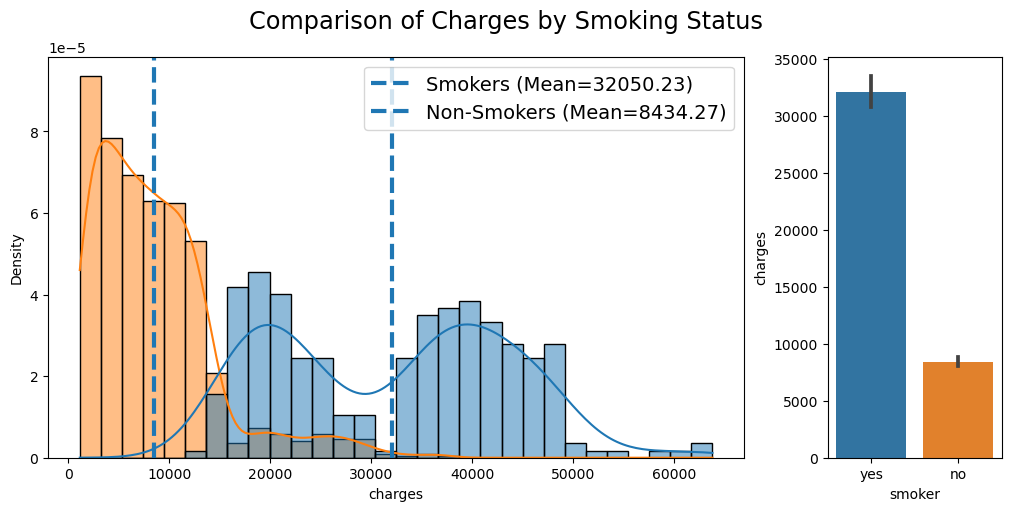

In [12]:
# Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smoker_var), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_var):.2f})")

ax.axvline(np.mean(no_smoker_var), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(no_smoker_var):.2f})")

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
# Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,)
fig.suptitle('Comparison of Charges by Smoking Status',fontsize='xx-large');

# Hypothesis: Men are more likely to smoke than women

## Null Hypothesis: There is no relationship between someone's sex and the likelyhood they smoke

## Alternative Hypothesis: A patients sex can determine likelyhood of smoking

### Assumptions:
### Two categoricals
### Independant outcomes

In [13]:
# Create a contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
# Execute test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [15]:
# Print p-value
print(p)
p<.05

0.006548143503580696


True

### We  again reject the null hypothesis as the P-value is less than our alpha (.05)

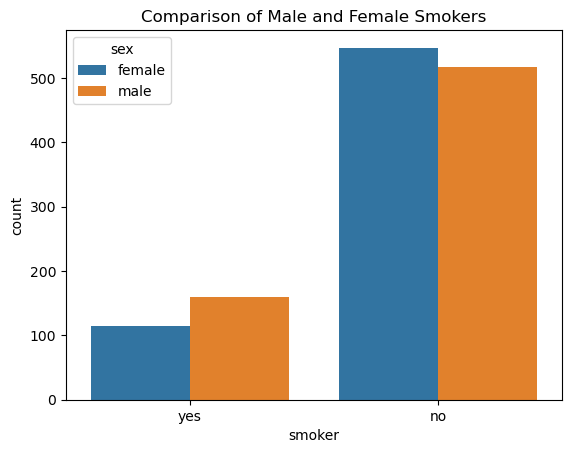

In [16]:
# Visualize counts of male and female smokers
ax = sns.countplot(data= df, x= 'smoker', hue= 'sex')
ax.set_title('Comparison of Male and Female Smokers');

# Hypothesis: Different regions have different charges, on average.

## Null Hypothesis: There is no relationship between someone's region and average charges

## Alternative Hypothesis: A patients region can alter their average charges

### Assumptions:

### Equal Variance

### No significant outliers

### Normality

In [17]:
# Create groups dictionary.
groups = {}
# Loop through all unique categories
for i in df['region'].unique():
    # Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [18]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [19]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [20]:
# Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

### Our P-value was less than .05 and our assumptions' were not met for the test

In [22]:
# ExecuteKruskal Wallis test since assumptions were not met
result = stats.kruskal(*groups)
result

c:\Users\Sly\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

After the Kruskal wallis test we still must reject the null hypothesis

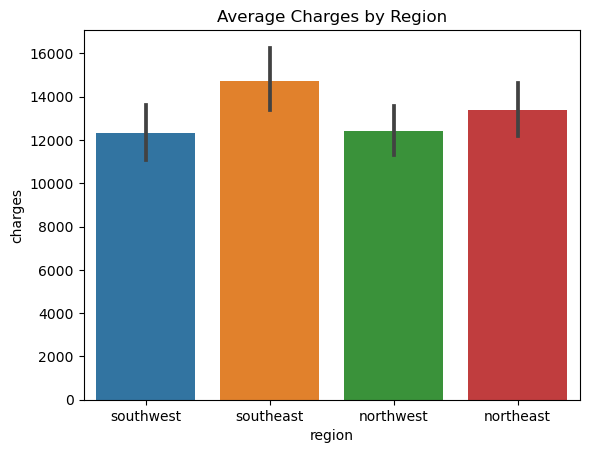

In [ ]:
ax = sns.barplot(data=df, x='region',y='charges')
ax.set_title('Average Charges by Region');